In [1]:
from astropy.table import Table, vstack
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import matplotlib 
from RegscorePy import *
from collections import OrderedDict
from radial_distribution_funcs import *
# import pymc3 as pm

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=20), plt.rc('ytick', labelsize=20)
plt.rcParams['savefig.dpi'] = 100
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)
figure_save_path = 'figures/radial_dist/'

In [2]:
bin_number=14
bin_edges_areas = 10 ** np.linspace(1.0, np.log10(700), num=bin_number + 1)
areas = np.array([])
for i in range(len(bin_edges_areas[:-1])):
    areas = np.append(areas, (bin_edges_areas[i + 1] ** 2 - bin_edges_areas[i] ** 2) * np.pi)
    

### Total Satellite Sample

### combine redshift bins
$0.3<z<0.5$

$0.5<z<0.7$

$0.7<z<0.9$

$0.9<z<1.1$

In [3]:
# combine redshift bin
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']

sat_z_cut = 3.0
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/'
masscut_low = '9.5'
masscut_high = '12.0'
csfq='all'
bin_number=14

# path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk_20bin/'
# masscut_low = '9.5'
# masscut_high = '12.0'
# csfq='all'
# bin_number=20

# path = 'CUT_deep_catalogs/radial_dist_code/distribution/split_mass_sfProb_nuvrk/'
# masscut_low = '10.2'
# masscut_high = '12.0'
# csfq='all'
# bin_number=14

radial_all = np.zeros(bin_number)
radial_all_err_square = np.zeros(bin_number)
radial_ssf = np.zeros(bin_number)
radial_ssf_err_square = np.zeros(bin_number)
radial_sq = np.zeros(bin_number)
radial_sq_err_square = np.zeros(bin_number)
count_all = 0
count_ssf = 0
count_sq = 0

bin_centers = np.load(path+'bin_centers.npy')
for z in [0.4, 0.6, 0.8, 1.0]:
    radial_z_all = combine_deep_fields(field_names,csfq,'all',masscut_low,masscut_high, z,sat_z_cut=sat_z_cut, path=path, bin_number=bin_number)
    count_all += radial_z_all[2]
    radial_all += radial_z_all[0]*radial_z_all[2]
    radial_all_err_square += radial_z_all[1]**2*radial_z_all[2]**2
        
    radial_z_ssf = combine_deep_fields(field_names,csfq,'ssf',masscut_low,masscut_high, z,sat_z_cut=sat_z_cut, path=path, bin_number=bin_number)
    count_ssf += radial_z_ssf[2]
    radial_ssf += radial_z_ssf[0]*radial_z_ssf[2]
    radial_ssf_err_square += radial_z_ssf[1]**2*radial_z_ssf[2]**2
        
    radial_z_sq = combine_deep_fields(field_names,csfq,'sq',masscut_low,masscut_high, z,sat_z_cut=sat_z_cut, path=path, bin_number=bin_number)
    count_sq += radial_z_sq[2]
    radial_sq += radial_z_sq[0]*radial_z_sq[2]
    radial_sq_err_square += radial_z_sq[1]**2*radial_z_sq[2]**2

radial_all = (radial_all/count_all, np.sqrt(radial_all_err_square)/count_all)
radial_ssf = (radial_ssf/count_ssf, np.sqrt(radial_ssf_err_square)/count_ssf)
radial_sq = (radial_sq/count_sq, np.sqrt(radial_sq_err_square)/count_sq)
print('No. of centrals',count_all)

np.savetxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_'+csfq+'_'+ 'all'+'.txt', radial_all)
np.savetxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_'+csfq+'_'+ 'ssf'+'.txt', radial_ssf)
np.savetxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_'+csfq+'_'+ 'sq'+'.txt', radial_sq)


No. of centrals 4506.0


## Catalog Figures

### Fig.1

In [18]:
import matplotlib.patches as patches

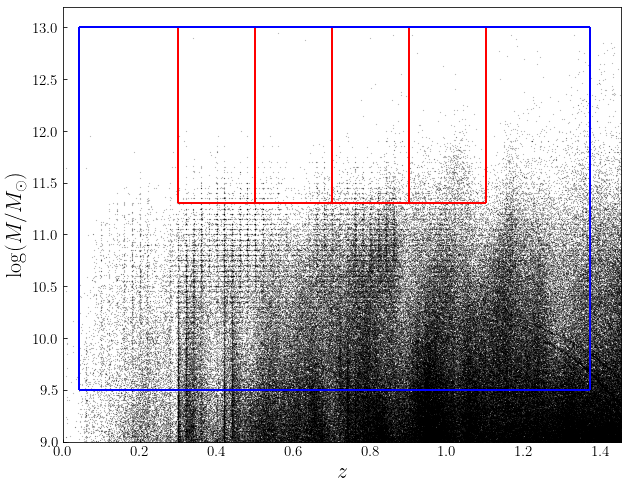

In [19]:
# mass vs z plot
fig = plt.figure(figsize=(10,8))
cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params.fits')
plt.scatter(cat['ZPHOT'],cat['MASS_MED'],s=0.01,color='k')

# add boxes
# centrals selection boxes
rect1 = patches.Rectangle((0.3,11.15),0.2,1.84,linewidth=3, edgecolor='r',facecolor='none')
plt.vlines(x=0.3,ymin=11.3,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.5,ymin=11.3,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.7,ymin=11.3,ymax=13,linewidth=2, color='r')
plt.vlines(x=0.9,ymin=11.3,ymax=13,linewidth=2, color='r')
plt.vlines(x=1.1,ymin=11.3,ymax=13,linewidth=2, color='r')
plt.hlines(y=11.3,xmin=0.3,xmax=1.1,linewidth=2, color='r')
plt.hlines(y=13.0,xmin=0.3,xmax=1.1,linewidth=2, color='r')

# satellite selection box
plt.vlines(x=0.0426,ymin=9.5,ymax=13,linewidth=2, color='b')
plt.vlines(x=1.37,ymin=9.5,ymax=13,linewidth=2, color='b')
plt.hlines(y=9.5,xmin=0.0426,xmax=1.37,linewidth=2, color='b')
plt.hlines(y=13.0,xmin=0.0426,xmax=1.37,linewidth=2, color='b')

plt.xlabel(r'$z$',fontsize=22)
plt.ylabel(r'$\log(M/M_\odot)$',fontsize=22)

plt.xlim([0,1.45])
plt.ylim([9,13.2])
plt.savefig(figure_save_path+'mass_redshift_deep.png')

### Fig.2

In [31]:
# stack satellite/background catalogs
stack_type = 'background'
# stack_type = 'satellites'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/'
for z in [0.4,0.6,0.8, 1.0]:
    for k, cat_name in enumerate(['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']):
        cat_sat = Table.read(path+stack_type+'_' + cat_name + '_'+str(z)+'.fits')
        if k == 0:
            cat_sat_stack = cat_sat
        else:
            cat_sat_stack = vstack([cat_sat_stack, cat_sat], metadata_conflicts='silent')

    cat_sat_stack.write(path+stack_type+'_'+str(z)+'.fits',overwrite=True)

In [34]:
# stack central catalogs
# stack_type = 'satellites'
path = 'CUT_deep_catalogs/radial_dist_code/central_cat/'
for z in [0.4, 0.6, 0.8, 1.0]:
    for k, cat_name in enumerate(['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']):
        cat_sat = Table.read(path+'isolated_'+cat_name+'_3.0_11.3_'+str(z)+'_massive.positions.fits')
        if k == 0:
            cat_sat_stack = cat_sat
        else:
            cat_sat_stack = vstack([cat_sat_stack, cat_sat], metadata_conflicts='silent')

    cat_sat_stack.write(path+'isolated_3.0_11.3_'+str(z)+'_massive.positions.fits',overwrite=True)

0.9116103258317823 0.9273917271945398
673 673
0.9184542139186372 0.9294917022487144
765 765
0.9346748343606692 0.9361671040453341
1450 1450
0.9327028521753794 0.9286295860650273
1618 1618


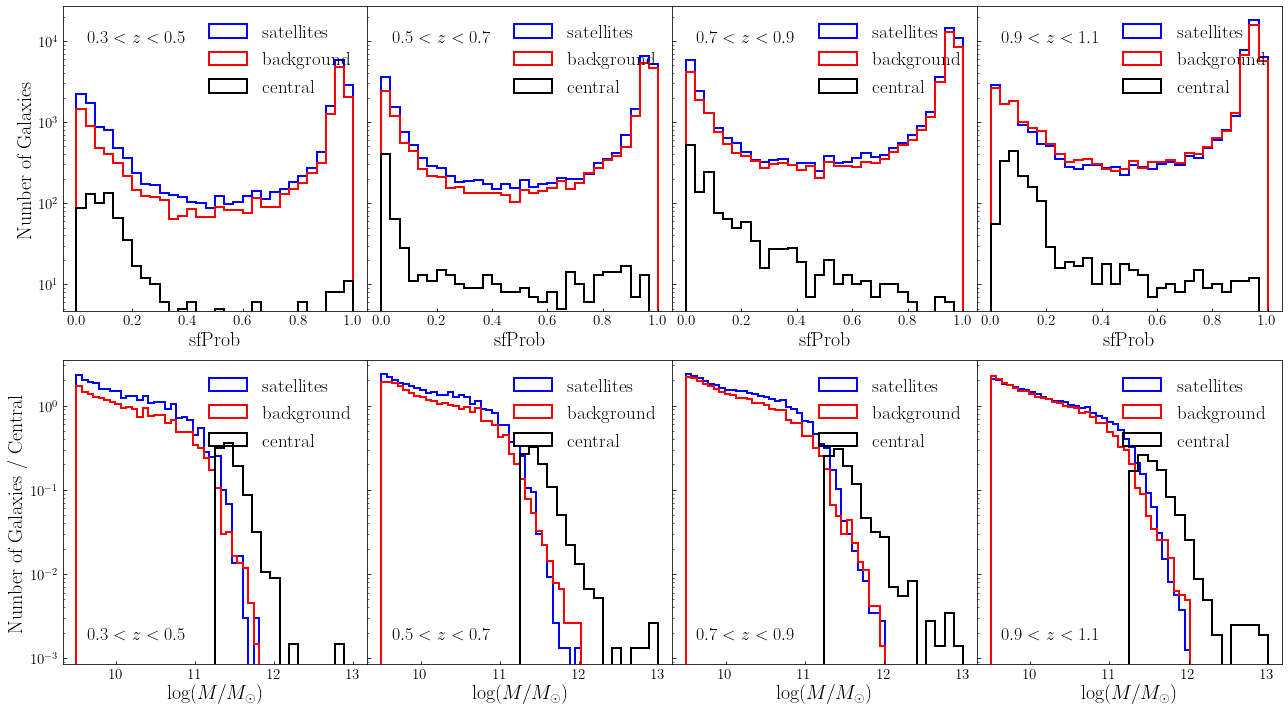

In [36]:
fig, axs = plt.subplots(2, 4, sharey='row', figsize = (18, 10),gridspec_kw={'height_ratios':[4,4]})
zs = [0.4, 0.6, 0.8, 1.0]
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/'
for i in range(4):
    z=zs[i]
    cat_stack = Table.read(path+'satellites_'+str(z)+'.fits')
    cat_stack_bkg = Table.read(path+'/background_'+str(z)+'.fits')
    cat_central = Table.read('CUT_deep_catalogs/radial_dist_code/central_cat/isolated_'+str(sat_z_cut)+'_11.3_'+str(z)+'_massive.positions.fits')
    
    cat_stack = np.unique(cat_stack)
    cat_stack_bkg = np.unique(cat_stack_bkg)

    sfprob_list = cat_stack['sfProb_nuvrk']
    sfprob_list_bkg = cat_stack_bkg['sfProb_nuvrk']
    sfprob_list_cen = cat_central['sfProb_nuvrk']
    
    mass_list = np.array(cat_stack['MASS_MED'])
    mass_list_bkg = np.array(cat_stack_bkg['MASS_MED'])
    print(np.median(sfprob_list),np.median(sfprob_list_bkg))
    mass_list_cen = np.array(cat_central['MASS_MED'])
    
    axs[0][i].hist(sfprob_list,range=(0,1.0),histtype='step',linewidth=2, color='b',bins=30,label='satellites')
    axs[0][i].hist(sfprob_list_bkg,range=(0,1),histtype='step',linewidth=2, color='r',bins=30,label='background')
    axs[0][i].hist(sfprob_list_cen,range=(0,1),histtype='step',linewidth=2, color='k',bins=30,label='central')
    
    axs[1][i].hist(mass_list,range=(9.5,13),histtype='step',linewidth=2, color='b',bins=50,
         weights=np.ones(len(mass_list))/len(cat_central),label='satellites')
    axs[1][i].hist(mass_list_bkg,range=(9.5,13),histtype='step',linewidth=2, color='r',bins=50,
         weights=np.ones(len(mass_list_bkg))/len(cat_central),label='background')
    axs[1][i].hist(mass_list_cen,range=(9.5,13),histtype='step',linewidth=2, color='k',bins=30,
         weights=np.ones(len(mass_list_cen))/len(cat_central),label='central')
    print(len(mass_list_cen),len(cat_central))
    
    axs[0][0].set_yscale('log')
    axs[1][0].set_yscale('log')
    axs[0][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.88]),
             xycoords='axes fraction',fontsize=18,color='k')
    axs[1][i].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',xy=([0.08,0.08]),
             xycoords='axes fraction',fontsize=18,color='k')
    
    axs[0][i].set_xlabel('sfProb',fontsize=20)
    axs[0][0].set_ylabel('Number of Galaxies',fontsize=20)
    axs[1][i].set_xlabel(r'$\log(M/M_\odot)$',fontsize=20)
    axs[1][0].set_ylabel('Number of Galaxies / Central',fontsize=20)
    
    axs[0][i].legend(fontsize=19,frameon=False)
    axs[1][i].legend(fontsize=19,loc='upper right',frameon=False)
    
plt.tight_layout()
fig.subplots_adjust(wspace=0)  
plt.savefig(figure_save_path+'sfprob_mass_hist_combined.png',dpi=100)

## Result Figures

### fig.4
allz ($0.3<z<1.1$) plot

nfw+sersic [4.500e+02 1.123e-05 3.517e-05 3.420e+01 1.669e+00] [1.017e+02 2.798e-06 1.154e-05 6.803e+00 1.320e+00] 0.5768994284675814
nfw+sersic [4.500e+02 6.474e-06 2.026e-05 2.567e+01 1.425e+00] [1.563e+02 2.337e-06 4.440e-05 2.487e+01 4.252e+00] 1.6083561134654454
nfw+sersic [2.634e+02 8.767e-06 2.084e-05 3.255e+01 7.779e-01] [1.520e+01 6.053e-07 1.990e-06 1.543e+00 1.619e-01] 0.09784067466960156


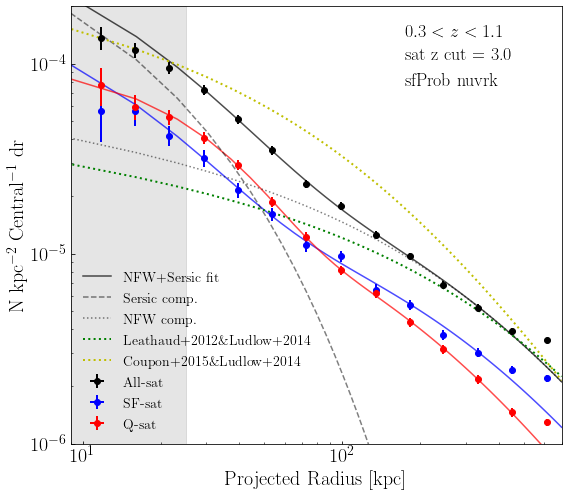

In [4]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'
masscut_low = '9.5'
masscut_high = '12.0'
csfq='all'
sat_z_cut = 3.0
bin_edges = np.load(path+'bin_edges.npy')
bin_centers = np.load(path+'bin_centers.npy')
minus = bin_centers - bin_edges[:-1]
plus = bin_edges[1:] - bin_centers

start=4
color=['k','b','r']
sat_type = ['All','SF','Q']
fit_x = np.linspace(2,700,num=100)

count_radial_allz = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'all'+'.txt')
count_radial_sf_allz = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'ssf'+'.txt')
count_radial_q_allz = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'sq'+'.txt')

########
for i, radial in enumerate([count_radial_allz, count_radial_sf_allz, count_radial_q_allz]):
    label='NFW+Sersic fit' if i==0 else ''
    plt.errorbar(bin_centers, radial[0],yerr=radial[1],xerr=0,fmt='o'+color[i],label=sat_type[i]+'-sat',linewidth=2)
    
    popt_allz,pcov_allz,chi2_allz = fit_nfw_sersic(bin_centers,radial[0],radial[1], 4)
    perr_allz = np.sqrt(np.diag(pcov_allz))
    print('nfw+sersic',popt_allz,perr_allz,chi2_allz/(len(bin_edges)-start+1 - len(popt_allz)))
    plt.plot(fit_x,nfw_sersic(fit_x, popt_allz[0],popt_allz[1],popt_allz[2],popt_allz[3],popt_allz[4]),color[i],alpha=0.7,label=label)
        
popt_allz,pcov_allz,chi2_allz = fit_nfw_sersic(bin_centers,count_radial_allz[0],count_radial_allz[1], 4)
plt.plot(fit_x,sersic(fit_x, popt_allz[2],popt_allz[3],popt_allz[4]),'--k',alpha=0.5,label='Sersic comp.')
plt.plot(fit_x,nfw(fit_x,popt_allz[0],popt_allz[1]),':k',alpha=0.5,label='NFW comp.')

# prediction of rs from DM mass distribution 
# median central mass --> halo mass --> rs
rs_range1 = [647] # m_h from Leathaud et al. 2012
rs_range2 = [156] # m_h from Coupon et al. 2015
references = ['Leathaud+2012\&Ludlow+2014','Coupon+2015\&Ludlow+2014']
colors = ['g','y']
norm_to_value = nfw_sersic(bin_centers[-1], popt_allz[0],popt_allz[1],popt_allz[2],popt_allz[3],popt_allz[4])
for i,rs_range in enumerate([rs_range1,rs_range2]):
    for j,rs in enumerate(rs_range):
        norm_guess = 1e-4
        norm = norm_guess/(nfw(fit_x,rs,norm_guess)[-10]/norm_to_value)
        plt.plot(fit_x,nfw(fit_x,rs,norm),':'+colors[i],linewidth=2,label=references[i] if j==0 else'')
        
plt.annotate(r'$0.3<z<1.1$',xy=([0.68,0.93]),xycoords='axes fraction',fontsize=18,color='k')
plt.annotate('sat z cut = '+str(sat_z_cut),xy=([0.68,0.88]),xycoords='axes fraction',fontsize=18,color='k')
plt.annotate(sfq_method.replace('_',' '),xy=([0.68,0.82]),xycoords='axes fraction',fontsize=18,color='k')

plt.axvspan(9, 25, alpha=0.1, color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([9,700])
plt.ylim([1e-6,2e-4])
plt.xlabel('Projected Radius [kpc]', fontsize=20)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=20)
plt.legend(fontsize=14,frameon=False,loc='lower left')
plt.tight_layout()
plt.savefig(figure_save_path+'number_density_allz.png')


Clearly an excess over NFW profile is present within 100kpc, relatively unchanged feature from old data. Quiescent satellite galaxies seem to be more concentrated (higher slope). The upturn at the outmost bin may needs more investigation, it seems that if happens mostly in the higher two redshift bins ($0.7<z<1.1$). Errorbar on the x-axis show the bin ranges.

..



### fig.5

split central mass

['ELAIS_deep', 'DEEP_deep', 'COSMOS_deep', 'XMM-LSS_deep']


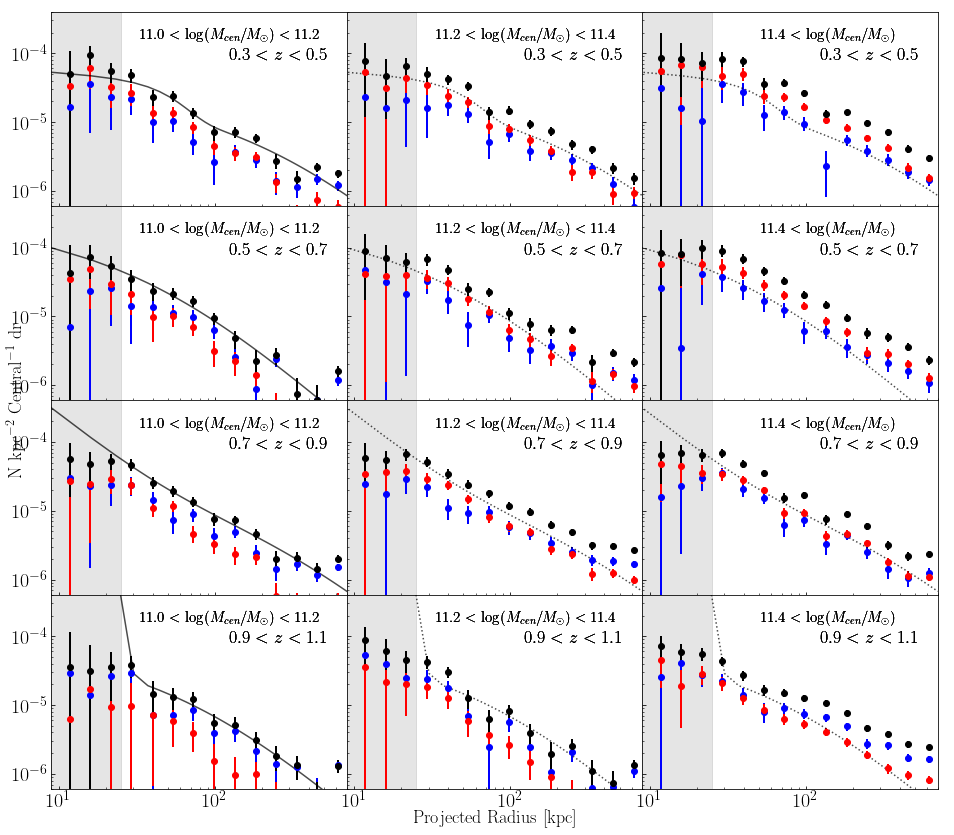

In [11]:
fig, axs = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(14,12))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

sample_all=''
csfq='all'
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
print(field_names)

#============= primary data ===========
path1 = 'CUT_deep_catalogs/radial_dist_code/distribution/split_cen_mass_11.0_11.2/'
path2 = 'CUT_deep_catalogs/radial_dist_code/distribution/split_cen_mass_11.2_11.4/' 
path3 = 'CUT_deep_catalogs/radial_dist_code/distribution/split_cen_mass_11.4_13.0/' 
sample_name1 = r'v8 cat, $M>11.3$, sat z cut  ='+str(sat_z_cut)
bin_edges = np.load(path1+'bin_centers.npy')
colors = ['b','r','k']

for i,z in enumerate([0.4, 0.6, 0.8, 1.0]):
    for k,ssfq in enumerate(['ssf','sq','all']):
        count_radial_4 = combine_deep_fields(field_names, csfq,ssfq,'9.5','12.0',z,path1,sat_z_cut=sat_z_cut,sample=sample_all)
        count_radial_6 = combine_deep_fields(field_names, csfq,ssfq,'9.5','12.0',z,path2,sat_z_cut=sat_z_cut,sample=sample_all)
        count_radial_8 = combine_deep_fields(field_names, csfq,ssfq,'9.5','12.0',z,path3,sat_z_cut=sat_z_cut,sample=sample_all)
        axs[i][0].errorbar(bin_edges, count_radial_4[0],count_radial_4[1],fmt='o'+colors[k],linewidth=2)
        axs[i][1].errorbar(bin_edges, count_radial_6[0],count_radial_6[1],fmt='o'+colors[k],linewidth=2)
        axs[i][2].errorbar(bin_edges, count_radial_8[0],count_radial_8[1],fmt='o'+colors[k],linewidth=2)
        
        axs[i][0].annotate(r'$11.0<\log(M_{cen}/M_\odot)<11.2$',(0.3,0.85), fontsize=15, xycoords='axes fraction')
        axs[i][1].annotate(r'$11.2<\log(M_{cen}/M_\odot)<11.4$',(0.3,0.85), fontsize=15, xycoords='axes fraction')
        axs[i][2].annotate(r'$11.4<\log(M_{cen}/M_\odot)$',(0.4,0.85), fontsize=15, xycoords='axes fraction')
        axs[i][0].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',(0.6,0.75), fontsize=18, xycoords='axes fraction')
        axs[i][1].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',(0.6,0.75), fontsize=18, xycoords='axes fraction')
        axs[i][2].annotate(r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',(0.6,0.75), fontsize=18, xycoords='axes fraction')
        
    #========= fitting =====================
    fit_x = np.linspace(2,700,num=100)
    start = 4

    # NFW + Sersic Fitting
    model = 'NFW_Sersic'
    popt4,pcov4,chi2_4 = fit_nfw_sersic(bin_edges,count_radial_4[0],count_radial_4[1], start)
    popt6,pcov6,chi2_6 = fit_nfw_sersic(bin_edges,count_radial_6[0],count_radial_6[1], start)
    popt8,pcov8,chi2_8 = fit_nfw_sersic_fix_n(bin_edges,count_radial_8[0],count_radial_8[1], start)
    perr4 = np.sqrt(np.diag(pcov4))
    perr6 = np.sqrt(np.diag(pcov6))
    perr8 = np.sqrt(np.diag(pcov8))
    popt4,pcov4,chi2_4 = fit_nfw_sersic(bin_edges,count_radial_4[0],count_radial_4[1], start)
    
    #=========== Plot Model ==================
    axs[i][0].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),'k',alpha=0.7)
    axs[i][1].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)
    axs[i][2].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)

    axs[i][0].axvspan(9, 25, alpha=0.1, color='k')
    axs[i][1].axvspan(9, 25, alpha=0.1, color='k')
    axs[i][2].axvspan(9, 25, alpha=0.1, color='k')
    axs[i][0].set_xticks([20, 100, 400])
    axs[i][0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[i][0].set_xlim([9,700])
    axs[i][0].set_ylim([6e-7,4e-4])
    axs[i][0].set_yscale('log')
    axs[i][0].set_xscale('log')
#     axs[i][0].legend(fontsize=15)
#     axs[i][1].legend(fontsize=15)
#     axs[i][2].legend(fontsize=15)

#=========
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig(figure_save_path+'split_host_mass_sfProb.png') 
plt.show() 


This plot shows sample split by central mass and redshift. In each row, you can see that more massive central have larger number of satellite galaxies. In terms of concentration, I cannot see significant difference.

...

### fig.6 
split csfq (allz plot $0.3<z<1.1$)

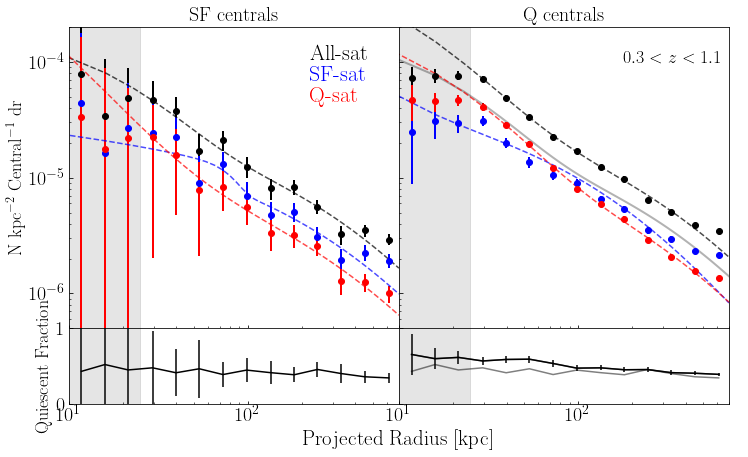

In [5]:
# combine redshift bins
fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize = (11, 7),gridspec_kw={'height_ratios':[4,1]})
np.set_printoptions(precision=3)
start=4
sat_z_cut=3.0
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/'
bin_centers = np.load(path+'bin_centers.npy')

for i in range(1):
    axs[i][0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    csfqs = ['csf','cq']
    for j in range(2):
        csfq = csfqs[j]
        radial_all = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'all'+'.txt')
        radial_sf = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'ssf'+'.txt')
        radial_q = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'sq'+'.txt')
        
        red_frac = radial_q[0] / radial_all[0]
        red_err = red_frac_err_new(radial_q[0],radial_all[0],radial_q[1],radial_all[1])
        
        axs[1][j].errorbar(bin_centers, red_frac,yerr=red_err,color='k')
        axs[1][1].plot(bin_centers, red_frac, color='k',alpha=0.5)
        
        # plot radial number density profiles
        for radial, color, yloc in [(radial_all,'k',0.21), (radial_sf,'b',0.13), (radial_q,'r',0.05)]:
            axs[i][j].errorbar(bin_centers, radial[0],radial[1],fmt='o',color=color,linewidth=2,label='all')
        
            # model fitting
            fit_x = np.linspace(2,700,num=100)        
            popt,pcov,chi2 = fit_nfw_sersic(bin_centers,radial[0],radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            
            axs[0][j].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'--'+color,alpha=0.7)
            if j==0 and color=='k':
                axs[0][1].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1]*0.85,popt[2],popt[3],popt[4]),color,alpha=0.3,linewidth=2)
        
        # add shaded (non-fitting) region
        axs[0][j].axvspan(10, 25, alpha=0.1, color='k')
        axs[1][j].axvspan(10, 25, alpha=0.1, color='k')

#=============================
axs[0][0].set_ylim([5e-7,2e-4])
axs[0][0].set_xlim([10,700])
axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[0][0].set_title('SF centrals',fontsize=20)
axs[0][1].set_title('Q centrals',fontsize=20)
axs[1][0].set_ylim([0,1])
axs[1][0].set_ylabel('Quiescent Fraction',fontsize=18)

# print all,sf,q info on figure
axs[0][0].annotate('All-sat',xy=([0.73,0.89]),xycoords='axes fraction',fontsize=22)
axs[0][0].annotate('SF-sat',xy=([0.73,0.82]),xycoords='axes fraction',fontsize=22,color='b')
axs[0][0].annotate('Q-sat',xy=([0.73,0.75]),xycoords='axes fraction',fontsize=22,color='r')
axs[0][1].annotate(r'$0.3<z<1.1$',xy=([0.68,0.88]),xycoords='axes fraction',fontsize=18,color='k')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=21)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig(figure_save_path+'splitting_central_sfq_allz.png')
plt.show(); plt.close()

This plot shows quiescent central galaxies have more satellite galaxies than star-forming galaxies, but not significantly. Also, quiescent galaxies do show a higher quiescent fraction in their satellite samples. This is the same result from the old data.

### fig.6  (part 2)
split csfq, mass matched (allz plot $0.3<z<1.1$)

[1.357e-04 7.386e-05 4.039e-05 2.248e-05 1.231e-05 6.905e-06 4.149e-06
 2.574e-06 1.678e-06 1.200e-06 8.409e-07 6.070e-07 4.396e-07 3.253e-07]
[3.439e-05 1.925e-05 1.142e-05 6.857e-06 4.006e-06 2.597e-06 1.656e-06
 1.174e-06 8.311e-07 5.894e-07 4.199e-07 3.014e-07 2.174e-07 1.589e-07]


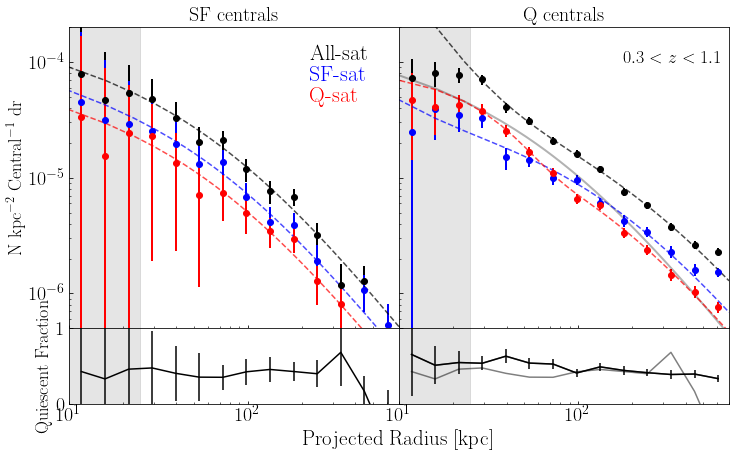

In [6]:
# combine redshift bins
fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize = (11, 7),gridspec_kw={'height_ratios':[4,1]})
np.set_printoptions(precision=3)
start=4
sat_z_cut=3.0
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk_matched_mass_csfq/'
bin_edges = np.load(path+'bin_edges.npy')
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2

for i in range(1):
    axs[i][0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    csfqs = ['csf','cq']
    for j in range(2):
        csfq = csfqs[j]
        radial_all = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'all'+'.txt')
        radial_sf = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'ssf'+'.txt')
        radial_q = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_9.5_12.0_'+csfq+'_'+ 'sq'+'.txt')
        print(radial_all[1])
        
        red_frac = radial_q[0] / radial_all[0smple
        red_err = red_frac_err_new(radial_q[0],radial_all[0],radial_q[1],radial_all[1])
        
        axs[1][j].errorbar(bin_centers, red_frac,yerr=red_err,color='k')
        axs[1][1].plot(bin_centers, red_frac, color='k',alpha=0.5)
        
        # plot radial number density profiles
        for radial, color, yloc in [(radial_all,'k',0.21), (radial_sf,'b',0.13), (radial_q,'r',0.05)]:
            axs[i][j].errorbar(bin_centers, radial[0],radial[1],fmt='o',color=color,linewidth=2,label='all')
        
            # model fitting
            fit_x = np.linspace(2,700,num=100)        
            popt,pcov,chi2 = fit_nfw_sersic(bin_centers,radial[0],radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            
            axs[0][j].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'--'+color,alpha=0.7)
            if j==0 and color=='k':
                axs[0][1].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1]*0.85,popt[2],popt[3],popt[4]),color,alpha=0.3,linewidth=2)
        
        # add shaded (non-fitting) region
        axs[0][j].axvspan(10, 25, alpha=0.1, color='k')
        axs[1][j].axvspan(10, 25, alpha=0.1, color='k')

#=============================
axs[0][0].set_ylim([5e-7,2e-4])
axs[0][0].set_xlim([10,700])
axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[0][0].set_title('SF centrals',fontsize=20)
axs[0][1].set_title('Q centrals',fontsize=20)
axs[1][0].set_ylim([0,1])
axs[1][0].set_ylabel('Quiescent Fraction',fontsize=18)

# print all,sf,q info on figure
axs[0][0].annotate('All-sat',xy=([0.73,0.89]),xycoords='axes fraction',fontsize=22)
axs[0][0].annotate('SF-sat',xy=([0.73,0.82]),xycoords='axes fraction',fontsize=22,color='b')
axs[0][0].annotate('Q-sat',xy=([0.73,0.75]),xycoords='axes fraction',fontsize=22,color='r')
axs[0][1].annotate(r'$0.3<z<1.1$',xy=([0.68,0.88]),xycoords='axes fraction',fontsize=18,color='k')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=21)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig(figure_save_path+'splitting_central_sfq_allz_matched.png')
plt.show(); plt.close()

### fig.7

split sat mass

No. of sats, total: 3.7 sf: 2.8 q: 0.9
No. of sats, total: 4.26 sf: 1.77 q: 2.48


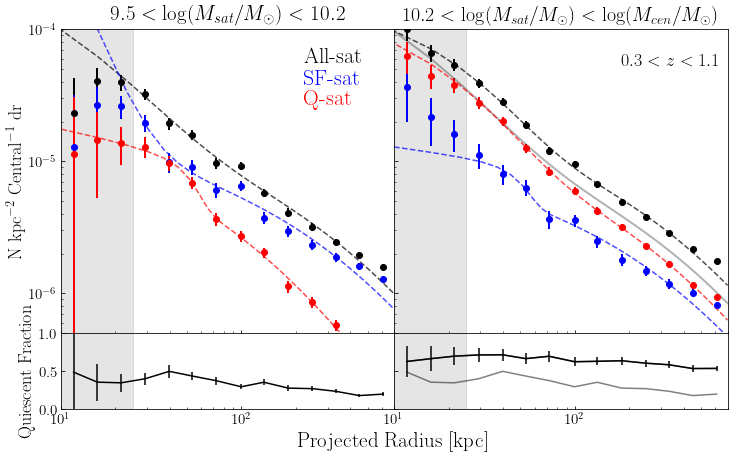

In [14]:
# combine redshift bins
fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize = (11, 7),gridspec_kw={'height_ratios':[4,1]})
np.set_printoptions(precision=3)

masscut_low = '9.5'
masscut_high = '10.2'
csfq='all'

start=4
sat_z_cut=3.0
path = 'CUT_deep_catalogs/radial_dist_code/distribution/split_mass_sfProb_nuvrk/'
bin_centers = np.load(path+'bin_centers.npy')

for i in range(1):
    axs[i][0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    mass_range = [9.5,10.2,12.0]
    for j in range(2):
        masscut_low = str(mass_range[j])
        masscut_high = str(mass_range[j+1])
        radial_all = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'all'+'.txt')
        radial_sf = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'ssf'+'.txt')
        radial_q = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'sq'+'.txt')
        red_err = red_frac_err_new(radial_q[0],radial_all[0],radial_q[1],radial_all[1])
        red_frac = radial_q[0] / radial_all[0]
        print('No. of sats, total:',round(sum(radial_all[0]*areas),2),
              'sf:',round(sum(radial_sf[0]*areas),2),
              'q:',round(sum(radial_q[0]*areas),2))
        
        axs[1][j].errorbar(bin_centers, red_frac,yerr=red_err, color='k')
        axs[1][1].plot(bin_centers, red_frac, color='k',alpha=0.5)
        
        # plot radial number density profiles
        for radial, color, yloc in [(radial_all,'k',0.21), (radial_sf,'b',0.13), (radial_q,'r',0.05)]:
            axs[i][j].errorbar(bin_centers, radial[0],radial[1],fmt='o',color=color,linewidth=2,label='all')
        
            # model fitting
            fit_x = np.linspace(2,700,num=100)        
            popt,pcov,chi2 = fit_nfw_sersic(bin_centers,radial[0],radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            
            axs[0][j].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'--'+color,alpha=0.7)
            if j==0 and color=='k':
                axs[0][1].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1]*0.85,popt[2],popt[3],popt[4]),color,alpha=0.3,linewidth=2)
        
        # add shaded (non-fitting) region
        axs[0][j].axvspan(10, 25, alpha=0.1, color='k')
        axs[1][j].axvspan(10, 25, alpha=0.1, color='k')

#=============================
axs[0][0].set_ylim([5e-7,1e-4])
axs[0][0].set_xlim([10,700])
axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[1][0].set_ylim([0,1])
axs[1][0].set_ylabel('Quiescent Fraction',fontsize=18)
axs[0][0].set_title('$9.5<\log(M_{sat}/M_\odot)<10.2$',fontsize=21)
axs[0][1].set_title('$10.2<\log(M_{sat}/M_\odot)<\log(M_{cen}/M_\odot)$',fontsize=20)

# print all,sf,q info on figure
axs[0][0].annotate('All-sat',xy=([0.73,0.89]),xycoords='axes fraction',fontsize=22)
axs[0][0].annotate('SF-sat',xy=([0.73,0.82]),xycoords='axes fraction',fontsize=22,color='b')
axs[0][0].annotate('Q-sat',xy=([0.73,0.75]),xycoords='axes fraction',fontsize=22,color='r')
axs[0][1].annotate(r'$0.3<z<1.1$',xy=([0.68,0.88]),xycoords='axes fraction',fontsize=18,color='k')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=21)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig(figure_save_path+'splitting_sat_mass_allz.png')
plt.show(); plt.close()


Higher mass satellites are slightly more concentrated and have higher quiescent fraction, which I believe will also be seen in stellar mass functions. Low-mass satellite galaxies seem to have a smaller concentration than from old data.Qualitatively, this result is not changed from the old data

However, in old data, I have these two samples at similar number densities, while here I have more high mass satelllites than low mass satellites
...

### fig.8

z evo

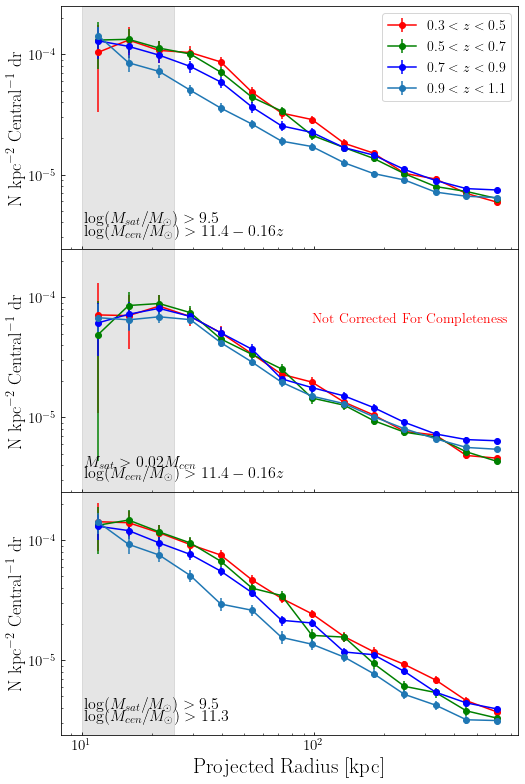

In [15]:
fig, axs = plt.subplots(3, 1, sharex=True,sharey=True, figsize=(7.5, 11))
sfq_method = 'sfProb_nuvrk'
sat_z_cut = 3.0
field_names =  ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']

########### panel 1: moving cut on centrals. fixed cut on satellites
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_evo_cenmass/'   # evolving mass cut
bin_centers = np.load(path+'bin_centers.npy')
radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut=sat_z_cut, path=path)
radial_6 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.6, sat_z_cut=sat_z_cut, path=path)
radial_8 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.8, sat_z_cut=sat_z_cut, path=path)
radial_10 = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.0, sat_z_cut=sat_z_cut, path=path)
axs[0].errorbar(bin_centers, radial_4[0],yerr=radial_4[1],fmt='or-',label='$0.3<z<0.5$')
axs[0].errorbar(bin_centers, radial_6[0],yerr=radial_6[1],fmt='og-',label='$0.5<z<0.7$')
axs[0].errorbar(bin_centers, radial_8[0],yerr=radial_8[1],fmt='ob-',label='$0.7<z<0.9$')
axs[0].errorbar(bin_centers, radial_10[0],yerr=radial_10[1],fmt='o-',label='$0.9<z<1.1$')
axs[0].axvspan(10, 25, alpha=0.1, color='k')
axs[0].legend(fontsize=14)

########### panel 2: moving cut on centrals and satellites
path =  'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_evo_cenmass/'  # evolving mass cut
radial_4 = combine_deep_fields(field_names,'all','all','0.02','0.99', 0.4, sat_z_cut=sat_z_cut, path=path)
radial_6 = combine_deep_fields(field_names,'all','all','0.02','0.99', 0.6, sat_z_cut=sat_z_cut, path=path)
radial_8 = combine_deep_fields(field_names,'all','all','0.02','0.99', 0.8, sat_z_cut=sat_z_cut, path=path)
radial_10 = combine_deep_fields(field_names,'all','all','0.02','0.99', 1.0, sat_z_cut=sat_z_cut, path=path)
axs[1].errorbar(bin_centers, radial_4[0],yerr=radial_4[1],fmt='or-',label='$0.3<z<0.5$')
axs[1].errorbar(bin_centers, radial_6[0],yerr=radial_6[1],fmt='og-',label='$0.5<z<0.7$')
axs[1].errorbar(bin_centers, radial_8[0],yerr=radial_8[1],fmt='ob-',label='$0.7<z<0.9$')
axs[1].errorbar(bin_centers, radial_10[0],yerr=radial_10[1],fmt='o-',label='$0.9<z<1.1$')
axs[1].annotate('Not Corrected For Completeness',xy=([0.55,0.7]),xycoords='axes fraction',fontsize=14,color='r')
axs[1].axvspan(10, 25, alpha=0.1, color='k')

########### panel 3: fixed cuts for centrals and satellites
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'  # evolving mass cut
radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut=sat_z_cut, path=path)
radial_6 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.6, sat_z_cut=sat_z_cut, path=path)
radial_8 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.8, sat_z_cut=sat_z_cut, path=path)
radial_10 = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.0, sat_z_cut=sat_z_cut, path=path)
axs[2].errorbar(bin_centers, radial_4[0],yerr=radial_4[1],fmt='or-',label='$0.3<z<0.5$')
axs[2].errorbar(bin_centers, radial_6[0],yerr=radial_6[1],fmt='og-',label='$0.5<z<0.7$')
axs[2].errorbar(bin_centers, radial_8[0],yerr=radial_8[1],fmt='ob-',label='$0.7<z<0.9$')
axs[2].errorbar(bin_centers, radial_10[0],yerr=radial_10[1],fmt='o-',label='$0.7<z<0.9$')
axs[2].axvspan(10, 25, alpha=0.1, color='k')

# annotations
axs[2].annotate('$\log(M_{cen}/M_\odot)>11.3$',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=16,color='k')
axs[1].annotate('$\log(M_{cen}/M_\odot)>11.4-0.16z$',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=16,color='k')
axs[0].annotate('$\log(M_{cen}/M_\odot)>11.4-0.16z$',xy=([0.05,0.05]),xycoords='axes fraction',fontsize=16,color='k')

axs[2].annotate('$\log(M_{sat}/M_\odot)>9.5$',xy=([0.05,0.1]),xycoords='axes fraction',fontsize=16,color='k')
axs[1].annotate('$M_{sat}>0.02M_{cen}$',xy=([0.05,0.1]),xycoords='axes fraction',fontsize=16,color='k')
axs[0].annotate('$\log(M_{sat}/M_\odot)>9.5$',xy=([0.05,0.1]),xycoords='axes fraction',fontsize=16,color='k')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Projected Radius [kpc]', fontsize=21)
axs[0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
axs[1].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
axs[2].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig(figure_save_path+'radial_evolution_all_cuts.png')

All cuts show increase of number density at small radii, although most growth is in $0.9<z<1.1$ redshift bin, not really consistent with old data.

If I only look at $0.3<z<0.9$, then it's consistent with little or no growth.

### fig.9
z-evo plot for low/high mass satellites

/Users/lejay/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6649: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


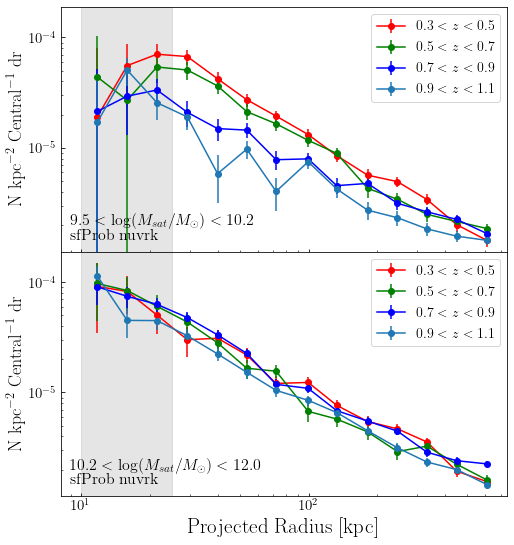

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True,sharey=True, figsize=(8, 9))
path = 'CUT_deep_catalogs/radial_dist_code/distribution/split_mass_sfProb_nuvrk/'
sfq_method = 'sfProb_nuvrk'

sat_z_cut = 3.0
bin_centers = np.load(path+'bin_centers.npy')
masscut_lows = ['9.5','10.2']
masscut_highs = ['10.2','12.0']
colors = ['r','g','b','']
for i in range(2):
    for k,z in enumerate([0.4,0.6,0.8,1.0]):
        radial_4 = combine_deep_fields(field_names,'all','all',masscut_lows[i],masscut_highs[i], z, sat_z_cut=sat_z_cut, path=path)
    
        axs[i].errorbar(bin_centers, radial_4[0],yerr=radial_4[1],fmt='o'+colors[k]+'-',
                        label=r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$')
    axs[i].annotate(sfq_method.replace('_',' '),xy=([0.02,0.05]),xycoords='axes fraction',fontsize=16,color='k')
    axs[i].annotate('$'+masscut_lows[i]+'<\log(M_{sat}/M_\odot)<'+masscut_highs[i]+'$',xy=([0.02,0.1]),xycoords='axes fraction',fontsize=16,color='k')
    
    axs[i].axhline(2e-5,10,700,linewidth=4, color='r')
    axs[i].axvspan(10, 25, alpha=0.1, color='k')
    axs[i].legend(fontsize=14)
    axs[i].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    plt.xscale('log')
    plt.yscale('log')

fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.xlabel('Projected Radius [kpc]', fontsize=21)
plt.savefig(figure_save_path+'radial_evolution_low_high_sat_mass.png')

This clearly shows that number density lower mass satellites grow more than higher mass satellite galaxies and grows more at small radii, consistent with old data. So I think we can still make sense of the interpretation before (dynamical friction and tidal stripping).

## compare with Illustris-TNG simulation

r_s obs 445.32145535548335 111.06273287724393


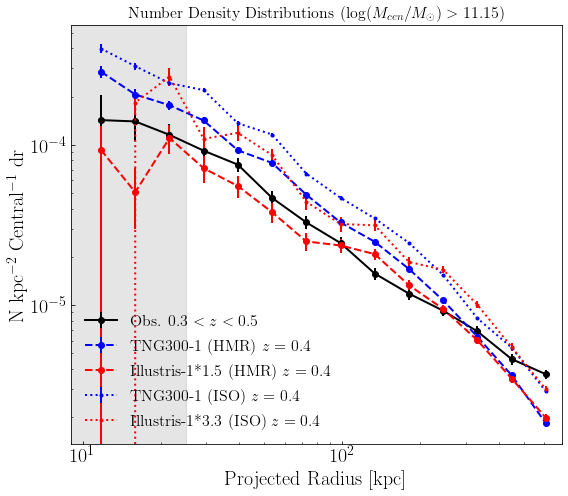

In [8]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'

count_radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut=sat_z_cut, path=path)

count_radial_tng = np.load('radial_tng_4.npy')  
count_radial_tng[1] = count_radial_tng[1]/areas/count_radial_tng[2]
count_radial_tng[0] = count_radial_tng[0]/areas/count_radial_tng[2]

count_radial_il = np.load('radial_il_4.npy')  
count_radial_il[1] = count_radial_il[1]/areas/count_radial_il[2]
count_radial_il[0] = count_radial_il[0]/areas/count_radial_il[2]

count_radial_tng_old = np.load('radial_tng_4_old.npy')  
count_radial_tng_old[1] = count_radial_tng_old[1]/areas/count_radial_tng_old[2]
count_radial_tng_old[0] = count_radial_tng_old[0]/areas/count_radial_tng_old[2]

count_radial_il_old = np.load('radial_il_4_old.npy')  
count_radial_il_old[1] = count_radial_il_old[1]/areas/count_radial_il_old[2]
count_radial_il_old[0] = count_radial_il_old[0]/areas/count_radial_il_old[2]

plt.errorbar(bin_centers, count_radial_4[0],count_radial_4[1],fmt='-ok',label=r'Obs. $0.3<z<0.5$',linewidth=2)
plt.errorbar(bin_centers, count_radial_tng[0], yerr=count_radial_tng[1], fmt='--ob',linewidth=2,label=r'TNG300-1 (HMR) $z=0.4$')
plt.errorbar(bin_centers, count_radial_il[0]*1.5, yerr=count_radial_il[1]*np.sqrt(1.5), fmt='--or',linewidth=2,label=r'Illustris-1*1.5 (HMR) $z=0.4$')

plt.errorbar(bin_centers, count_radial_tng_old[0], yerr=count_radial_tng[1], fmt='.:b',linewidth=2,label=r'TNG300-1 (ISO) $z=0.4$')
plt.errorbar(bin_centers, count_radial_il_old[0]*3.3, yerr=count_radial_il[1]*np.sqrt(3.3), fmt='.:r',linewidth=2,label=r'Illustris-1*3.3 (ISO) $z=0.4$')

# fitting
fit_x = np.linspace(2,700,num=100)
popt4,pcov4,chi2_4 = fit_nfw_sersic(bin_centers,count_radial_4[0],count_radial_4[1], start)
print('r_s obs',popt4[0],np.sqrt(np.diag(pcov4))[0])

# shade region
plt.axvspan(9, 25, alpha=0.1, color='k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([9,700])
plt.xlabel('Projected Radius [kpc]', fontsize=20)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=20)
plt.title('Number Density Distributions ($\log(M_{cen}/M_\odot)>11.15$)', fontsize=16)
plt.legend(fontsize=16,frameon=False,loc='lower left')
plt.tight_layout()
plt.savefig(figure_save_path+'TNG_Obs_compare.png')



### Split z-bin Figures

all mass / sfr

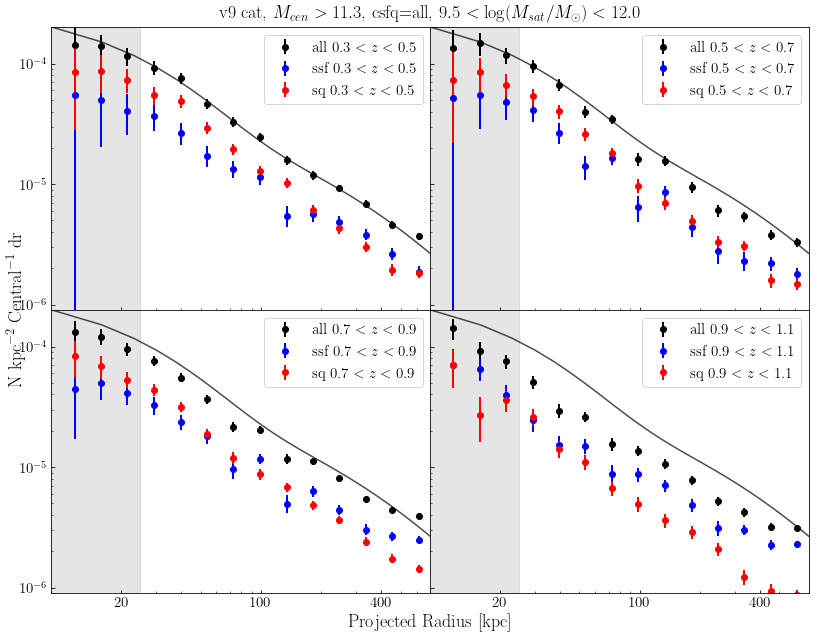

In [115]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,9))
sample_all=''
csfq='all'
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
colors = ['k','b','r']
#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/' 
sample_name = r'v9 cat, $M_{cen}>11.3$, csfq='+csfq+', $9.5<\log(M_{sat}/M_\odot)<12.0$'

for i,z in enumerate([0.4,0.6,0.8,1.0]):
    row = i // 2; col = i % 2
    for k,ssfq in enumerate(['all','ssf','sq']):
        count_radial = combine_deep_fields(field_names, csfq, ssfq,'9.5','12.0',z,path,sat_z_cut=sat_z_cut,sample=sample_all)
        bin_edges = np.load(path+'bin_centers.npy')
        #==============plot====================
        axs[row][col].errorbar(bin_edges, count_radial[0],count_radial[1],fmt='o'+colors[k],
                           label=ssfq+' $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',linewidth=2)
        axs[row][col].set_yscale('log')
        axs[row][col].set_xscale('log')
        if ssfq == 'all' and i==0:  #========= NFW + Sersic Fitting =====================
            fit_x = np.linspace(2,700,num=100); start = 4; model = 'NFW_Sersic'
            popt,pcov,chi2 = fit_nfw_sersic(bin_edges,count_radial[0],count_radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            #=========== Plot Model ==================
            for j in range(4):
                row1 = j // 2; col1 = j % 2
                axs[row1][col1].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'k',alpha=0.7)
    
    axs[row][col].axvspan(9, 25, alpha=0.1, color='k')
    axs[row][col].legend(fontsize=15)
    axs[row][col].set_xticks([20, 100, 400])
    axs[row][col].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[row][col].set_xlim([9,700])
    axs[row][col].set_ylim([9e-7,2e-4])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
plt.title(sample_name,fontsize=18)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show() 


This figure ... Number density increase toward lower redshift.

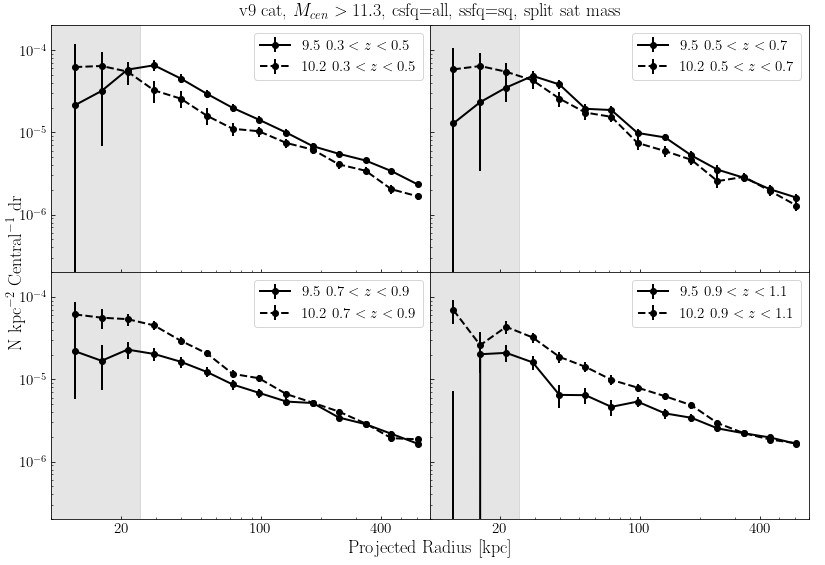

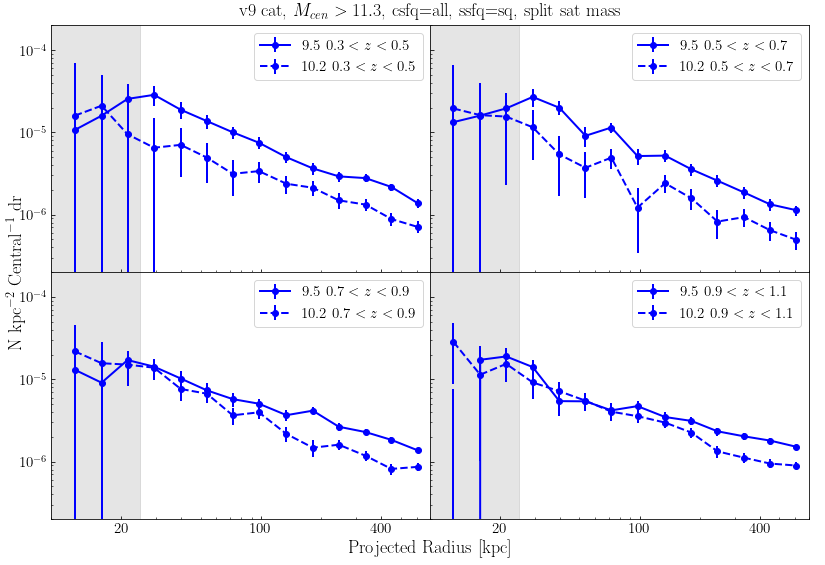

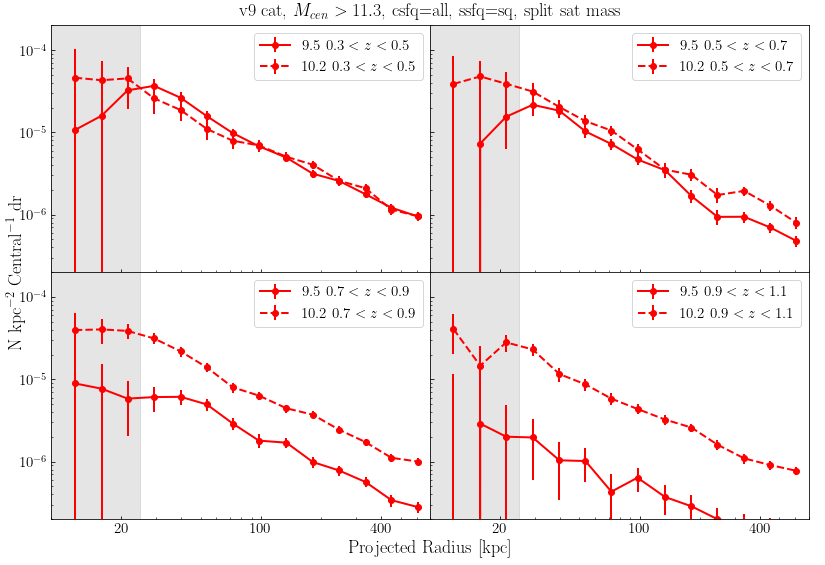

In [25]:
sample_all=''
csfq='all'
colors=['k','b','r']
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
linestyles = ['-','--']
#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/split_mass_sfProb_nuvrk/'
sample_name = r'v9 cat, $M_{cen}>11.3$, csfq='+csfq+', ssfq='+ssfq+', split sat mass'
masscut_lows = ['9.5','10.2']
masscut_highs = ['10.2','12.0']

for ssfq_num, ssfq in enumerate(['all','ssf','sq']):
    fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,8))
    for i,z in enumerate([0.4,0.6,0.8,1.0]):
        row = i // 2; col = i % 2
        for k in range(2):
            count_radial = combine_deep_fields(field_names, csfq,ssfq,masscut_lows[k],masscut_highs[k],z,path,sat_z_cut=sat_z_cut,sample=sample_all)
            bin_edges = np.load(path+'bin_centers.npy')
            #==============plot====================
            axs[row][col].errorbar(bin_edges, count_radial[0],count_radial[1],fmt='o'+colors[ssfq_num]+linestyles[k],
                               label=masscut_lows[k]+' $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',linewidth=2)
            axs[row][col].set_yscale('log')
            axs[row][col].set_xscale('log')
            if ssfq == 'all':  #========= NFW + Sersic Fitting =====================
                fit_x = np.linspace(2,700,num=100); start = 4; model = 'NFW_Sersic'
                popt,pcov,chi2 = fit_nfw_sersic(bin_edges,count_radial[0],count_radial[1], start)
                perr = np.sqrt(np.diag(pcov))
                #=========== Plot Model ==================
    #           axs[row][col].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'k',alpha=0.7)
    
        axs[row][col].axvspan(9, 25, alpha=0.1, color='k')
        axs[row][col].legend(fontsize=15)
        axs[row][col].set_xticks([20, 100, 400])
        axs[row][col].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        axs[row][col].set_xlim([9,700])
        axs[row][col].set_ylim([2e-7,2e-4])

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel('Projected Radius [kpc]', fontsize=18)
    plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
    plt.tight_layout()
    plt.title(sample_name,fontsize=18)
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0)
    
plt.show() 

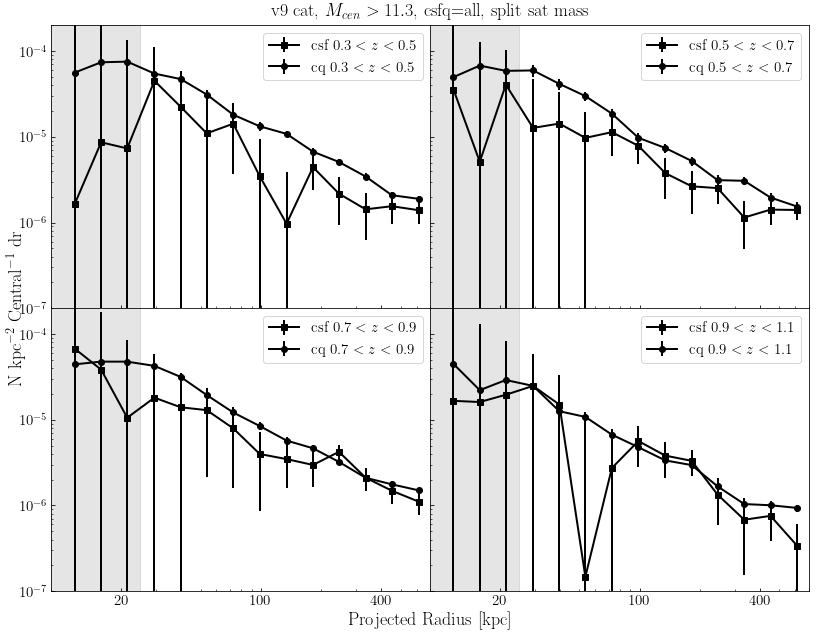

In [72]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12,9))
sample_all=''
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
markerstyles = ['s','o']
#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/'
sample_name = r'v9 cat, $M_{cen}>11.3$, csfq='+csfq+', split sat mass'
csfqs=['csf','cq']

for i,z in enumerate([0.4,0.6,0.8,1.0]):
    row = i // 2; col = i % 2
    for k in range(2):
        count_radial = combine_deep_fields(field_names, csfqs[k], ssfq,'9.5','12.0',z,path,sat_z_cut=sat_z_cut,sample=sample_all)
        bin_edges = np.load(path+'bin_centers.npy')
        #==============plot====================
        axs[row][col].errorbar(bin_edges, count_radial[0],count_radial[1],fmt=markerstyles[k]+'k-',
                           label=csfqs[k]+' $'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',linewidth=2)
        axs[row][col].set_yscale('log')
        axs[row][col].set_xscale('log')
        if ssfq == 'all':  #========= NFW + Sersic Fitting =====================
            fit_x = np.linspace(2,700,num=100); start = 4; model = 'NFW_Sersic'
            popt,pcov,chi2 = fit_nfw_sersic(bin_edges,count_radial[0],count_radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            #=========== Plot Model ==================
            axs[row][col].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'k',alpha=0.7)
    
    axs[row][col].axvspan(9, 25, alpha=0.1, color='k')
    axs[row][col].legend(fontsize=15)
    axs[row][col].set_xticks([20, 100, 400])
    axs[row][col].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[row][col].set_xlim([9,700])
    axs[row][col].set_ylim([1e-7,2e-4])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
plt.title(sample_name,fontsize=18)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show() 

#### moving mass cut for centrals ($\log(M/M_\odot)>11.4-0.16z$)
relative cut for satellites (0.02-0.1 and 0.1-0.99 central mass)

In [ ]:
# combine redshift bins
fig, axs = plt.subplots(2, 2, sharex=True, sharey='row', figsize = (11, 7),gridspec_kw={'height_ratios':[4,1]})
np.set_printoptions(precision=3)
csfq='all'

start=4
sat_z_cut=3.0
path = 'CUT_deep_catalogs/radial_dist_code/distribution/split_mass_sfProb_nuvrk/'
bin_centers = np.load(path+'bin_centers.npy')

for i in range(1):
    axs[i][0].set_ylabel('N kpc$^{-2}$ Central$^{-1}$ dr',fontsize=18)
    mass_range = [0.02, 0.1, 0.99]
    for j in range(2):
        masscut_low = str(mass_range[j])
        masscut_high = str(mass_range[j+1])
        radial_all = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'all'+'.txt')
        radial_sf = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'ssf'+'.txt')
        radial_q = np.genfromtxt(path+'all_field_'+str(sat_z_cut)+'_'+masscut_low+'_'+masscut_high+'_all_'+ 'sq'+'.txt')
        red_err = red_frac_err_new(radial_q[0],radial_all[0],radial_q[1],radial_all[1])
        red_frac = radial_q[0] / radial_all[0]
        print('No. of sats, total:',round(sum(radial_all[0]*areas),2),
              'sf:',round(sum(radial_sf[0]*areas),2),
              'q:',round(sum(radial_q[0]*areas),2))
        
        axs[1][j].errorbar(bin_centers, red_frac,yerr=red_err, color='k')
        axs[1][1].plot(bin_centers, red_frac, color='k',alpha=0.5)
        
        # plot radial number density profiles
        for radial, color, yloc in [(radial_all,'k',0.21), (radial_sf,'b',0.13), (radial_q,'r',0.05)]:
            axs[i][j].errorbar(bin_centers, radial[0],radial[1],fmt='o',color=color,linewidth=2,label='all')
        
            # model fitting
            fit_x = np.linspace(2,700,num=100)        
            popt,pcov,chi2 = fit_nfw_sersic(bin_centers,radial[0],radial[1], start)
            perr = np.sqrt(np.diag(pcov))
            
            axs[0][j].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'--'+color,alpha=0.7)
            if j==0 and color=='k':
                axs[0][1].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1]*0.85,popt[2],popt[3],popt[4]),color,alpha=0.3,linewidth=2)
        
        # add shaded (non-fitting) region
        axs[0][j].axvspan(10, 25, alpha=0.1, color='k')
        axs[1][j].axvspan(10, 25, alpha=0.1, color='k')

#=============================
axs[0][0].set_ylim([5e-7,1e-4])
axs[0][0].set_xlim([10,700])
axs[0][0].set_yscale('log')
axs[0][0].set_xscale('log')
axs[1][0].set_ylim([0,1])
axs[1][0].set_ylabel('Quiescent Fraction',fontsize=18)
axs[0][0].set_title('$9.5<\log(M_{sat}/M_\odot)<10.2$',fontsize=21)
axs[0][1].set_title('$10.2<\log(M_{sat}/M_\odot)<\log(M_{cen}/M_\odot)$',fontsize=20)

# print all,sf,q info on figure
axs[0][0].annotate('All-sat',xy=([0.73,0.89]),xycoords='axes fraction',fontsize=22)
axs[0][0].annotate('SF-sat',xy=([0.73,0.82]),xycoords='axes fraction',fontsize=22,color='b')
axs[0][0].annotate('Q-sat',xy=([0.73,0.75]),xycoords='axes fraction',fontsize=22,color='r')
axs[0][1].annotate(r'$0.3<z<1.1$',xy=([0.68,0.88]),xycoords='axes fraction',fontsize=18,color='k')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Projected Radius [kpc]', fontsize=21)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.savefig('figures/splitting_sat_mass_allz.png')
plt.show(); plt.close()

### Comparison Figures

#### compare with old catalog

['ELAIS_deep', 'DEEP_deep', 'COSMOS_deep', 'XMM-LSS_deep']
fitting NFW+Sersic
dof: 6
--------all---------
[3.008e+02 2.048e-05 4.387e-05 3.398e+01 6.180e-01] [7.149e+01 5.528e-06 1.534e-05 6.216e+00 5.284e-01] Chi2_dof=0.86
[2.886e+03 2.165e-06 1.712e-06 3.000e+02 6.664e+00] [3.138e+04 1.814e-05 6.861e-05 7.389e+03 6.376e+01] Chi2_dof=1.07
[6.262e+02 9.155e-06 3.617e-05 3.459e+01 2.610e-01] [1.726e+02 2.346e-06 1.111e-05 6.774e+00 2.499e-01] Chi2_dof=4.31


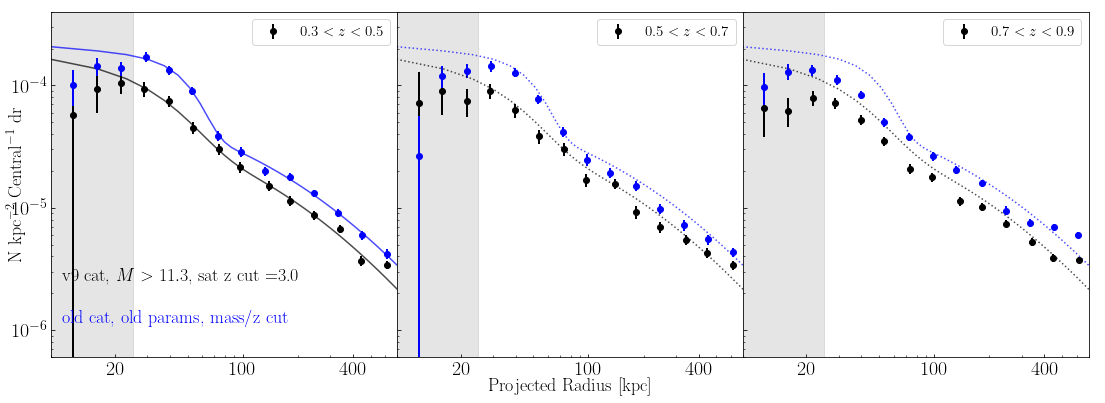

In [24]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

sample_all=''
csfq='all'
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
print(field_names)

#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/' 
sample_name1 = r'v9 cat, $M>11.3$, sat z cut  ='+str(sat_z_cut)

bin_edges = np.load(path+'bin_centers.npy')
count_radial_4 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.4,path,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_6 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.6,path,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_8 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.8,path,sat_z_cut=sat_z_cut,sample=sample_all)

# ============ secondary data ============
path2 = 'CUT_deep_catalogs/total_sample_0330/'
sample_name2 = 'old cat, old params, mass/z cut'

bin_edges2 = np.load(path2+'bin_centers.npy')
count_radial_4_2 = combine_deep_fields(field_names, csfq,'all','9.5','13.0',0.4,path2,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_6_2 = combine_deep_fields(field_names, csfq,'all','9.5','13.0',0.6,path2,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_8_2 = combine_deep_fields(field_names, csfq,'all','9.5','13.0',0.8,path2,sat_z_cut=sat_z_cut,sample=sample_all)

#==============plot====================
axs[0].errorbar(bin_edges, count_radial_4[0],count_radial_4[1],fmt='ok',label=r'$0.3<z<0.5$',linewidth=2)
axs[1].errorbar(bin_edges, count_radial_6[0],count_radial_6[1],fmt='ok',label=r'$0.5<z<0.7$',linewidth=2)
axs[2].errorbar(bin_edges, count_radial_8[0],count_radial_8[1],fmt='ok',label=r'$0.7<z<0.9$',linewidth=2)

axs[0].errorbar(bin_edges2, count_radial_4_2[0],count_radial_4_2[1],fmt='ob',linewidth=2)
axs[1].errorbar(bin_edges2, count_radial_6_2[0],count_radial_6_2[1],fmt='ob',linewidth=2)
axs[2].errorbar(bin_edges2, count_radial_8_2[0],count_radial_8_2[1],fmt='ob',linewidth=2)

axs[0].set_yscale('log')
axs[0].set_xscale('log')

#========= fitting =====================
fit_x = np.linspace(2,700,num=100)
start = 4

# NFW + Sersic Fitting
print('fitting NFW+Sersic')
model = 'NFW_Sersic'
popt4,pcov4,chi2_4 = fit_nfw_sersic(bin_edges,count_radial_4[0],count_radial_4[1], start)
popt6,pcov6,chi2_6 = fit_nfw_sersic(bin_edges,count_radial_6[0],count_radial_6[1], start)
popt8,pcov8,chi2_8 = fit_nfw_sersic_fix_n(bin_edges,count_radial_8[0],count_radial_8[1], start)
perr4 = np.sqrt(np.diag(pcov4))
perr6 = np.sqrt(np.diag(pcov6))
perr8 = np.sqrt(np.diag(pcov8))
popt42,pcov42,chi2_42 = fit_nfw_sersic(bin_edges,count_radial_4_2[0],count_radial_4_2[1], start)

#=========== Plot Model ==================
axs[0].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),'k',alpha=0.7)
axs[1].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)
axs[2].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)

axs[0].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),'b',alpha=0.7)
axs[1].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),':b',alpha=0.7)
axs[2].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),':b',alpha=0.7)

np.set_printoptions(precision=3)
dof = len(bin_edges)-start+1 - len(popt4) # degree of freedom
print('dof:',dof)
print('--------all---------')
print(popt4,perr4,'Chi2_dof='+str(round(chi2_4/dof,2)))
print(popt6,perr6,'Chi2_dof='+str(round(chi2_6/dof,2)))
print(popt8,perr8,'Chi2_dof='+str(round(chi2_8/dof,2)))

# print all,sf,q info on figure
axs[0].annotate(sample_name1,xy=([0.03,0.22]),xycoords='axes fraction',fontsize=18)
axs[0].annotate(sample_name2,xy=([0.03,0.10]),xycoords='axes fraction',fontsize=18,color='b')

#=========
axs[0].axvspan(9, 25, alpha=0.1, color='k')
axs[1].axvspan(9, 25, alpha=0.1, color='k')
axs[2].axvspan(9, 25, alpha=0.1, color='k')
axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)
axs[2].legend(fontsize=15)
axs[0].set_xticks([20, 100, 400])
axs[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xlim([9,700])
axs[0].set_ylim([6e-7,4e-4])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show() 

### check plots

##### multi-purpose check plot

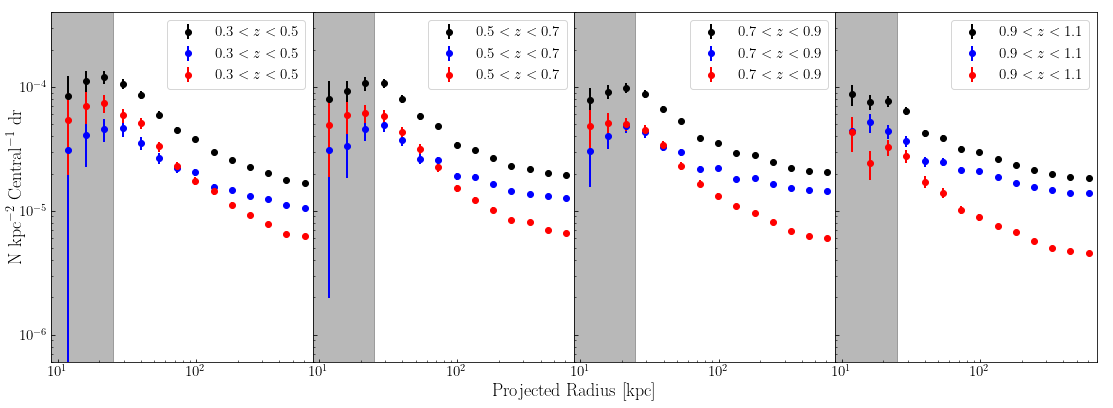

In [36]:
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(16,6))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)
sample_all='sat'; csfq='all'
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/' 
sample_name1 = r'v8 cat, $M>11.3$, sat z cut  ='+str(sat_z_cut)
bin_edges = np.load(path+'bin_centers.npy')
colors = ['k','b','r']
for k,ssfq in enumerate(['all','ssf','sq']):
    for i,z in enumerate([0.4,0.6,0.8,1.0]):
        count_radial = combine_deep_fields(field_names, csfq,ssfq,'9.5','12.0',z,path,sat_z_cut=sat_z_cut,sample=sample_all)
        axs[i].errorbar(bin_edges, count_radial[0],count_radial[1],fmt='o'+colors[k],label=r'$'+str(round(z-0.1,1))+'<z<'+str(round(z+0.1,1))+'$',linewidth=2)
        axs[i].axvspan(9, 25, alpha=0.1, color='k')
        axs[i].legend(fontsize=15)
        
        #========= NFW + Sersic Fitting =====================
#         fit_x = np.linspace(2,700,num=100)
#         start = 4
#         model = 'NFW_Sersic'
#         popt,pcov,chi2 = fit_nfw_sersic(bin_edges,count_radial[0],count_radial[1], start)
#         perr = np.sqrt(np.diag(pcov))
#         #=========== Plot Model ==================
#         axs[i].plot(fit_x,nfw_sersic(fit_x, popt[0],popt[1],popt[2],popt[3],popt[4]),'k',alpha=0.7)
        
axs[0].set_xticks([20, 100, 400])
axs[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xlim([9,700]); axs[0].set_ylim([6e-7,4e-4])
axs[0].set_yscale('log'); axs[0].set_xscale('log')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show() 

#### high-z objects only

sat_z_cut = 'highz' (z>2)

9.5-12.0

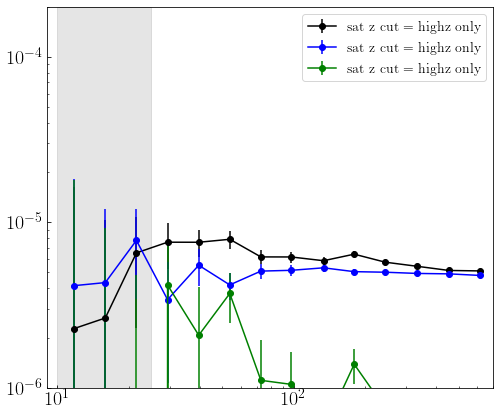

In [18]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
ssfq = 'all'
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
z=0.8
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'  # evolving mass cut
    
radial = combine_deep_fields(field_names,'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='sat', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black',label='sat z cut = highz only')

radial = combine_deep_fields(field_names,'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='bkg', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue',label='sat z cut = highz only')

radial = combine_deep_fields(field_names,'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='sat z cut = highz only')

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,2e-4])
plt.xscale('log')
plt.yscale('log')


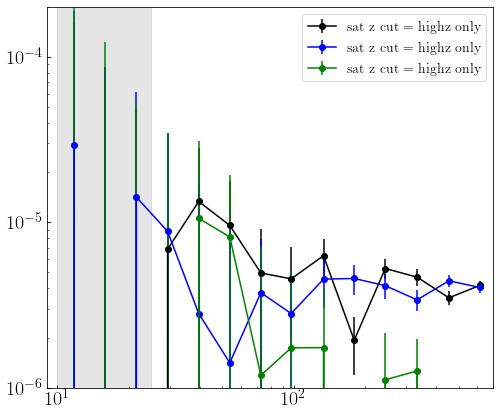

In [25]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
ssfq = 'all'
# bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'CLASS'
z=0.8
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_cosmos2020_'+sfq_method+'/'  # evolving mass cut
    
radial = combine_deep_fields(['COSMOS_deep'],'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='sat', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black',label='sat z cut = highz only')

radial = combine_deep_fields(['COSMOS_deep'],'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='bkg', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue',label='sat z cut = highz only')

radial = combine_deep_fields(['COSMOS_deep'],'all',ssfq,'9.5','12.0', z, sat_z_cut='highz',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='sat z cut = highz only')

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,2e-4])
plt.xscale('log')
plt.yscale('log')

#### 0.9-1.1 redshift bin

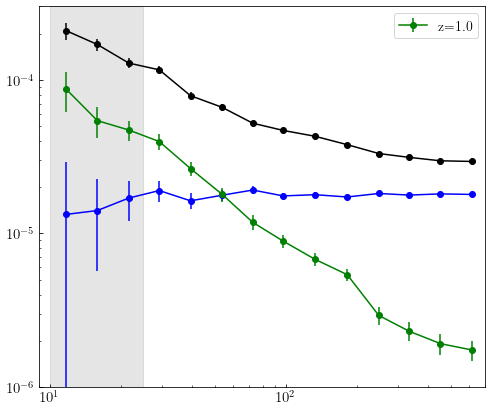

In [277]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/' 
    
radial = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.0, sat_z_cut='3.0',sample='sat', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black')

radial = combine_deep_fields(field_names,'all','ssf','9.5','12.0', 1.0, sat_z_cut='3.0',sample='bkg', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue')

radial = combine_deep_fields(field_names,'all','sq','9.5','12.0', 1.0, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='z=1.0')

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
plt.xscale('log')
plt.yscale('log')


#### no central count error

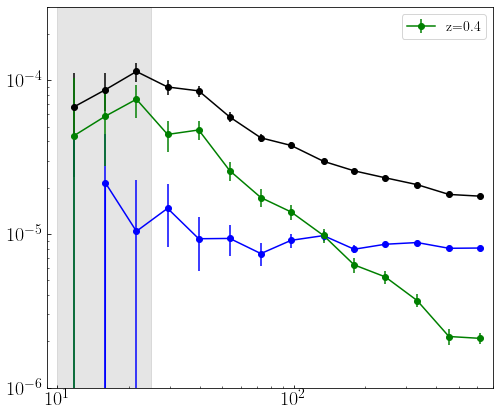

In [27]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_test_error/' 
z=0.4

radial = combine_deep_fields(field_names,'all','all','9.5','12.0', z, sat_z_cut='3.0',sample='sat', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black')

radial = combine_deep_fields(field_names,'all','ssf','9.5','12.0', z, sat_z_cut='3.0',sample='bkg', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue')

radial = combine_deep_fields(field_names,'all','sq','9.5','12.0', z, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='z='+str(z))

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
plt.xscale('log')
plt.yscale('log')


#### relative satellite mass cut
0.02 to 0.99 cen mass

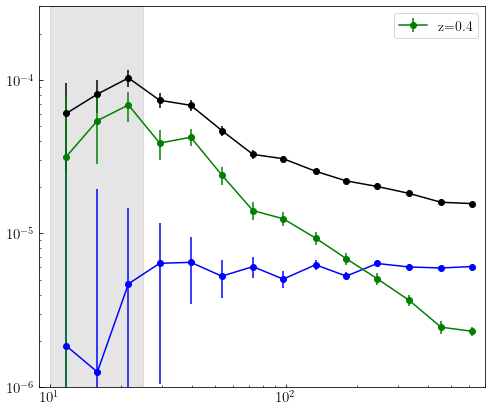

In [360]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_test_error/' 
z=0.4

radial = combine_deep_fields(field_names,'all','all','0.02','0.99', z, sat_z_cut='3.0',sample='sat', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black')

radial = combine_deep_fields(field_names,'all','ssf','0.02','0.99', z, sat_z_cut='3.0',sample='bkg', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue')

radial = combine_deep_fields(field_names,'all','sq','0.02','0.99', z, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='z='+str(z))

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
plt.xscale('log')
plt.yscale('log')


#### Moving Central Mass Cut
M>11.4-0.16z

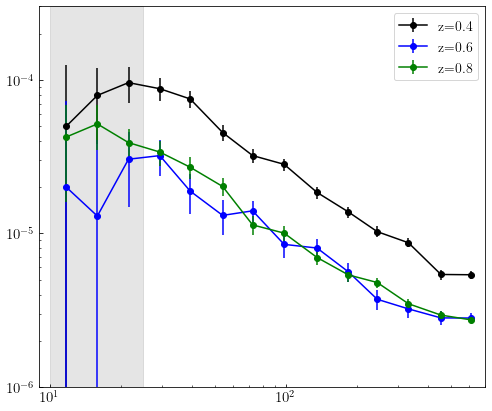

In [60]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_evo_cenmass/' 

radial = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black',label='z=0.4')

radial = combine_deep_fields(field_names,'all','ssf','9.5','12.0', 0.6, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue',label='z=0.6')

radial = combine_deep_fields(field_names,'all','sq','9.5','12.0', 0.8, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='z=0.8')

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
plt.xscale('log')
plt.yscale('log')




#### Moving Central Mass Cut
M>11.4-0.16z

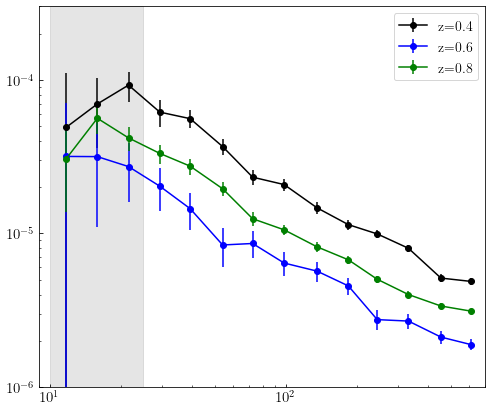

In [59]:
fig, axs = plt.subplots(1, 1, sharex=True,sharey='row', figsize=(8, 7))
bin_centers = np.load(path+'bin_centers.npy')
sfq_method = 'sfProb_nuvrk'
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_evo_cenmass/' 

radial = combine_deep_fields(field_names,'all','all','0.02','0.99', 0.4, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='black',label='z=0.4')

radial = combine_deep_fields(field_names,'all','ssf','0.02','0.99', 0.6, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='blue',label='z=0.6')

radial = combine_deep_fields(field_names,'all','sq','0.02','0.99', 0.8, sat_z_cut='3.0',sample='', path=path)
plt.errorbar(bin_centers, radial[0],yerr=radial[1],fmt='o-',color='green',label='z=0.8')
            

plt.axhline(2e-5,10,700,linewidth=4, color='r')
plt.axvspan(10, 25, alpha=0.1, color='k')
plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
plt.xscale('log')
plt.yscale('log')


#### COSMOS2020 check result

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


['ELAIS_deep', 'DEEP_deep', 'COSMOS_deep', 'XMM-LSS_deep']
fitting NFW+Sersic
dof: 6
--------all---------
[1.635e+02 3.737e-05 8.172e-05 3.583e+01 2.982e-01] [1.562e+02 4.691e-05 6.487e-05 1.061e+01 5.751e-01] Chi2_dof=0.86
[1.000e+04 1.851e-06 8.285e-05 4.208e+01 3.302e-01] [5.399e+04 3.210e-06 4.605e-05 8.841e+00 4.726e-01] Chi2_dof=0.69
[3.564e+02 2.236e-05 1.020e-05 1.590e+01 2.604e-01] [1.035e+02 6.775e-06 8.077e-04 3.004e+00 6.172e+01] Chi2_dof=0.79


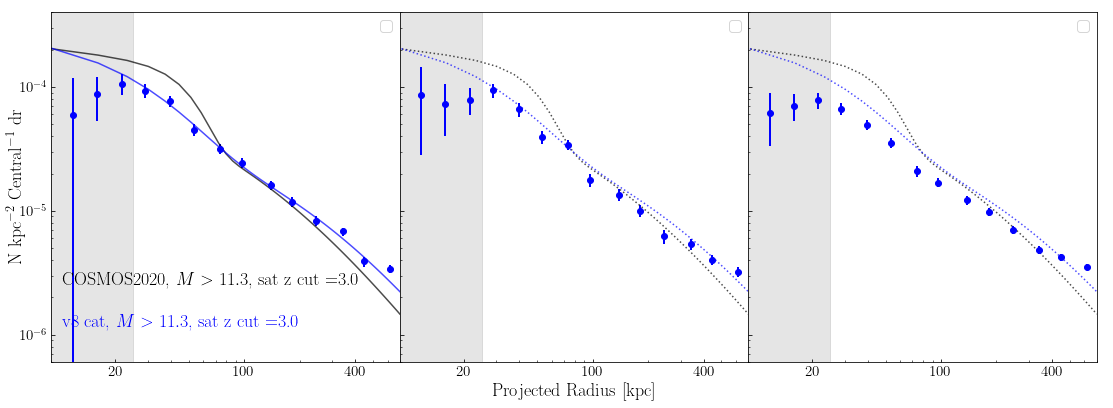

In [89]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16,6))
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=15), plt.rc('ytick', labelsize=15)

sample_all=''
csfq='all'
sat_z_cut = 3.0
field_names = ['ELAIS_deep','DEEP_deep','COSMOS_deep','XMM-LSS_deep']
print(field_names)

#============= primary data ===========
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_cosmos2020_CLASS/' 
sample_name1 = r'COSMOS2020, $M>11.3$, sat z cut  ='+str(sat_z_cut)

bin_edges = np.load(path+'bin_centers.npy')
count_radial_4 = combine_deep_fields(['COSMOS_deep'], csfq,'all','9.5','12.0',0.4,path,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_6 = combine_deep_fields(['COSMOS_deep'], csfq,'all','9.5','12.0',0.6,path,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_8 = combine_deep_fields(['COSMOS_deep'], csfq,'all','9.5','12.0',0.8,path,sat_z_cut=sat_z_cut,sample=sample_all)

# ============ secondary data ============
path2 = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_sfProb_nuvrk/' 
sample_name2 = r'v8 cat, $M>11.3$, sat z cut  ='+str(sat_z_cut)

bin_edges2 = np.load(path2+'bin_centers.npy')
count_radial_4_2 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.4,path2,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_6_2 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.6,path2,sat_z_cut=sat_z_cut,sample=sample_all)
count_radial_8_2 = combine_deep_fields(field_names, csfq,'all','9.5','12.0',0.8,path2,sat_z_cut=sat_z_cut,sample=sample_all)

#==============plot====================
# axs[0].errorbar(bin_edges, count_radial_4[0],count_radial_4[1],fmt='ok',label=r'$0.3<z<0.5$',linewidth=2)
# axs[1].errorbar(bin_edges, count_radial_6[0],count_radial_6[1],fmt='ok',label=r'$0.5<z<0.7$',linewidth=2)
# axs[2].errorbar(bin_edges, count_radial_8[0],count_radial_8[1],fmt='ok',label=r'$0.7<z<0.9$',linewidth=2)
axs[0].errorbar(bin_edges2, count_radial_4_2[0],count_radial_4_2[1],fmt='ob',linewidth=2)
axs[1].errorbar(bin_edges2, count_radial_6_2[0],count_radial_6_2[1],fmt='ob',linewidth=2)
axs[2].errorbar(bin_edges2, count_radial_8_2[0],count_radial_8_2[1],fmt='ob',linewidth=2)

axs[0].set_yscale('log')
axs[0].set_xscale('log')

#========= fitting =====================
fit_x = np.linspace(2,700,num=100)
start = 4

# NFW + Sersic Fitting
print('fitting NFW+Sersic')
model = 'NFW_Sersic'
popt4,pcov4,chi2_4 = fit_nfw_sersic(bin_edges,count_radial_4[0],count_radial_4[1], start)
popt6,pcov6,chi2_6 = fit_nfw_sersic(bin_edges,count_radial_6[0],count_radial_6[1], start)
popt8,pcov8,chi2_8 = fit_nfw_sersic_fix_n(bin_edges,count_radial_8[0],count_radial_8[1], start)
perr4 = np.sqrt(np.diag(pcov4))
perr6 = np.sqrt(np.diag(pcov6))
perr8 = np.sqrt(np.diag(pcov8))
popt42,pcov42,chi2_42 = fit_nfw_sersic(bin_edges,count_radial_4_2[0],count_radial_4_2[1], start)

#=========== Plot Model ==================
axs[0].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),'k',alpha=0.7)
axs[1].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)
axs[2].plot(fit_x,nfw_sersic(fit_x, popt4[0],popt4[1],popt4[2],popt4[3],popt4[4]),':k',alpha=0.7)

axs[0].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),'b',alpha=0.7)
axs[1].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),':b',alpha=0.7)
axs[2].plot(fit_x,nfw_sersic(fit_x, popt42[0],popt42[1],popt42[2],popt42[3],popt42[4]),':b',alpha=0.7)

np.set_printoptions(precision=3)
dof = len(bin_edges)-start+1 - len(popt4) # degree of freedom
print('dof:',dof)
print('--------all---------')
print(popt4,perr4,'Chi2_dof='+str(round(chi2_4/dof,2)))
print(popt6,perr6,'Chi2_dof='+str(round(chi2_6/dof,2)))
print(popt8,perr8,'Chi2_dof='+str(round(chi2_8/dof,2)))

# print all,sf,q info on figure
axs[0].annotate(sample_name1,xy=([0.03,0.22]),xycoords='axes fraction',fontsize=18)
axs[0].annotate(sample_name2,xy=([0.03,0.10]),xycoords='axes fraction',fontsize=18,color='b')

#=========
axs[0].axvspan(9, 25, alpha=0.1, color='k')
axs[1].axvspan(9, 25, alpha=0.1, color='k')
axs[2].axvspan(9, 25, alpha=0.1, color='k')
axs[0].legend(fontsize=15)
axs[1].legend(fontsize=15)
axs[2].legend(fontsize=15)
axs[0].set_xticks([20, 100, 400])
axs[0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axs[0].set_xlim([9,700])
axs[0].set_ylim([6e-7,4e-4])

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Projected Radius [kpc]', fontsize=18)
plt.ylabel('N kpc$^{-2}$ Central$^{-1}$ dr', fontsize=18)
plt.tight_layout()
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
plt.show() 

#### bkg level

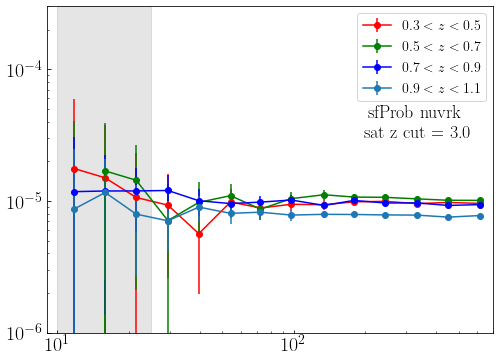

In [36]:
# z_evo plot
fig, axs = plt.subplots(1, 1, sharex=True,sharey=True, figsize=(8, 6))
sfq_method = 'sfProb_nuvrk'
sat_z_cut = 3.0
sample_all = 'bkg'

field_names = ['COSMOS_deep','XMM-LSS_deep','DEEP_deep','ELAIS_deep']
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'  # evolving mass cut
radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_6 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.6, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_8 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.8, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_10 = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.0, sat_z_cut=sat_z_cut, path=path,sample=sample_all)

axs.errorbar(bin_centers, radial_4[0],yerr=radial_4[1],fmt='or-',label='$0.3<z<0.5$')
axs.errorbar(bin_centers, radial_6[0],yerr=radial_6[1],fmt='og-',label='$0.5<z<0.7$')
axs.errorbar(bin_centers, radial_8[0],yerr=radial_8[1],fmt='ob-',label='$0.7<z<0.9$')
axs.errorbar(bin_centers, radial_10[0],yerr=radial_10[1],fmt='o-',label='$0.9<z<1.1$')
axs.annotate('sat z cut = '+str(sat_z_cut),xy=([0.71,0.60]),xycoords='axes fraction',fontsize=18,color='k')
axs.annotate(sfq_method.replace('_',' '),xy=([0.72,0.66]),xycoords='axes fraction',fontsize=18,color='k')
axs.axhline(2e-5,10,700,linewidth=4, color='r')
axs.axvspan(10, 25, alpha=0.1, color='k')

plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
axs.set_xscale('log')
axs.set_yscale('log')

#### inside_J
only part of COSMOS and XMM

[146.0, 218.0]
[172.0, 299.0]
[321.0, 435.0]
[493.0, 363.0]
[343.0, 519.0]


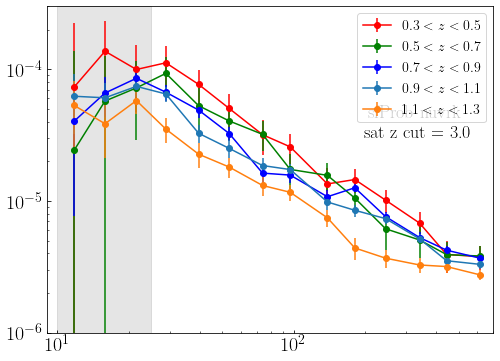

In [8]:
# z_evo plot
fig, axs = plt.subplots(1, 1, sharex=True,sharey=True, figsize=(8, 6))
sfq_method = 'sfProb_nuvrk'
sat_z_cut = 3.0
sample_all = ''

field_names = ['COSMOS_deep','XMM-LSS_deep']
path = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'  # evolving mass cut
bin_centers = np.load(path+'bin_centers.npy')

radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.4, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_6 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.6, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_8 = combine_deep_fields(field_names,'all','all','9.5','12.0', 0.8, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_10 = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.0, sat_z_cut=sat_z_cut, path=path,sample=sample_all)
radial_12 = combine_deep_fields(field_names,'all','all','9.5','12.0', 1.2, sat_z_cut=sat_z_cut, path=path,sample=sample_all)

axs.errorbar(bin_centers, radial_4[0],yerr=radial_4[1]*np.sqrt(5),fmt='or-',label='$0.3<z<0.5$')
axs.errorbar(bin_centers, radial_6[0],yerr=radial_6[1]*np.sqrt(5),fmt='og-',label='$0.5<z<0.7$')
axs.errorbar(bin_centers, radial_8[0],yerr=radial_8[1],fmt='ob-',label='$0.7<z<0.9$')
axs.errorbar(bin_centers, radial_10[0],yerr=radial_10[1],fmt='o-',label='$0.9<z<1.1$')
axs.errorbar(bin_centers, radial_12[0],yerr=radial_12[1],fmt='o-',label='$1.1<z<1.3$')
axs.annotate('sat z cut = '+str(sat_z_cut),xy=([0.71,0.60]),xycoords='axes fraction',fontsize=18,color='k')
axs.annotate(sfq_method.replace('_',' '),xy=([0.72,0.66]),xycoords='axes fraction',fontsize=18,color='k')
axs.axhline(2e-5,10,700,linewidth=4, color='r')
axs.axvspan(10, 25, alpha=0.1, color='k')

plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
axs.set_xscale('log')
axs.set_yscale('log')

[343.0, 519.0]
[58.0, 139.0]


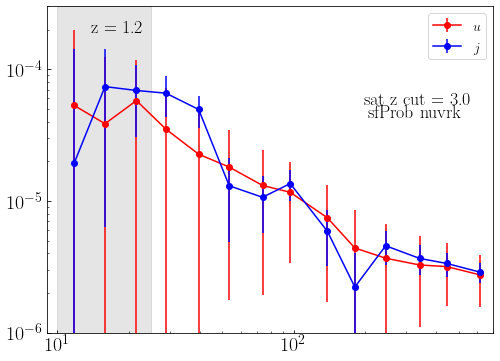

In [10]:
# z_evo plot
fig, axs = plt.subplots(1, 1, sharex=True,sharey=True, figsize=(8, 6))
sfq_method = 'sfProb_nuvrk'
sat_z_cut = 3.0
z=1.2
sample_all = ''


field_names = ['COSMOS_deep','XMM-LSS_deep']
path1 = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'/'  # evolving mass cut
path2 = 'CUT_deep_catalogs/radial_dist_code/distribution/total_sample_'+sfq_method+'_inside_j/'  # evolving mass cut
bin_centers = np.load(path1+'bin_centers.npy')

radial_4 = combine_deep_fields(field_names,'all','all','9.5','12.0', z, sat_z_cut=sat_z_cut, path=path1,sample=sample_all)
radial_6 = combine_deep_fields(field_names,'all','all','9.5','12.0', z, sat_z_cut=sat_z_cut, path=path2,sample=sample_all)

axs.errorbar(bin_centers, radial_4[0],yerr=radial_4[1]*5,fmt='or-',label='$u$')
axs.errorbar(bin_centers, radial_6[0],yerr=radial_6[1],fmt='ob-',label='$j$')
axs.annotate('sat z cut = '+str(sat_z_cut),xy=([0.71,0.70]),xycoords='axes fraction',fontsize=18,color='k')
axs.annotate(sfq_method.replace('_',' '),xy=([0.72,0.66]),xycoords='axes fraction',fontsize=18,color='k')
axs.annotate('z  = '+str(z),xy=([0.1,0.92]),xycoords='axes fraction',fontsize=18,color='k')
axs.axhline(2e-5,10,700,linewidth=4, color='r')
axs.axvspan(10, 25, alpha=0.1, color='k')

plt.legend(fontsize=14)
plt.xlim([9,700])
plt.ylim([1e-6,3e-4])
axs.set_xscale('log')
axs.set_yscale('log')
